In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
file = uproot.open('/home/wangbtc/all_pmt_test_240607T1658_0.root')
tree = file['daq']

In [4]:
# List of channel names (replace with actual channel names in your ROOT file)
channel_names = ['adc_b1_ch0', 'adc_b1_ch1', 'adc_b1_ch2', 'adc_b1_ch3', 'adc_b1_ch4', 'adc_b1_ch5', 'adc_b1_ch6', 'adc_b1_ch7', 'adc_b1_ch8', 'adc_b1_ch9', 'adc_b1_ch10', 'adc_b1_ch11', 'adc_b1_ch12', 'adc_b1_ch13', 'adc_b1_ch14', 'adc_b1_ch15', 'adc_b2_ch0', 'adc_b2_ch1', 'adc_b2_ch2', 'adc_b2_ch3', 'adc_b2_ch4', 'adc_b2_ch5', 'adc_b2_ch6', 'adc_b2_ch7', 'adc_b2_ch8', 'adc_b2_ch9', 'adc_b2_ch10', 'adc_b2_ch11', 'adc_b2_ch12', 'adc_b2_ch13', 'adc_b2_ch14', 'adc_b2_ch15', 'adc_b3_ch0', 'adc_b3_ch1', 'adc_b3_ch2', 'adc_b3_ch3', 'adc_b3_ch4', 'adc_b3_ch5', 'adc_b3_ch6', 'adc_b3_ch7']
# Read each channel into a dictionary
channels = {name: tree[name].array() for name in channel_names}

In [16]:
# Pulse finding algorithm
def find_pulses(channel_data, threshold):
    pulses = []
    pulse_start = None
    for i, value in enumerate(channel_data):
        if value > threshold and pulse_start is None:
            pulse_start = i
        elif value < threshold and pulse_start is not None:
            pulses.append((pulse_start, i))
            pulse_start = None
    if pulse_start is not None:
        pulses.append((pulse_start, len(channel_data)))  # In case a pulse extends to the end
    return pulses



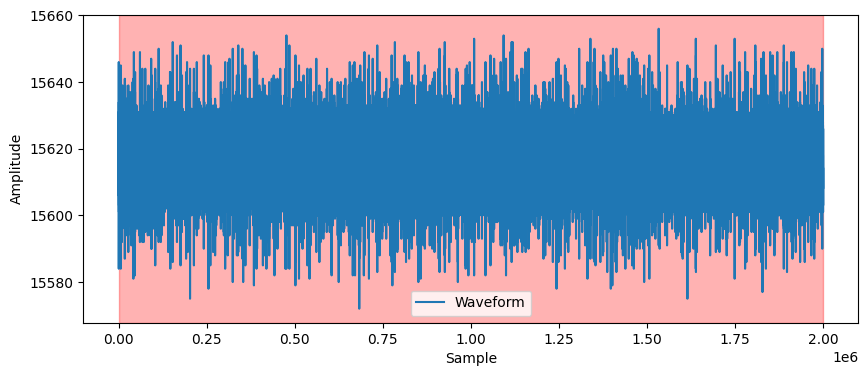

In [17]:
# Plot waveform function
def plot_waveform(channel_data, pulses=None):
    plt.figure(figsize=(10, 4))
    plt.plot(channel_data, label='Waveform')
    if pulses:
        for pulse in pulses:
            plt.axvspan(pulse[0], pulse[1], color='red', alpha=0.3)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Example usage:
channel_name = 'adc_b1_ch0'
channel_data = channels[channel_name].to_numpy()  # Ensure it's converted to NumPy array

# Ensure the data is a 1D array for the algorithm
if channel_data.ndim > 1:
    channel_data = channel_data.flatten()

pulses = find_pulses(channel_data, threshold=5)
plot_waveform(channel_data, pulses)

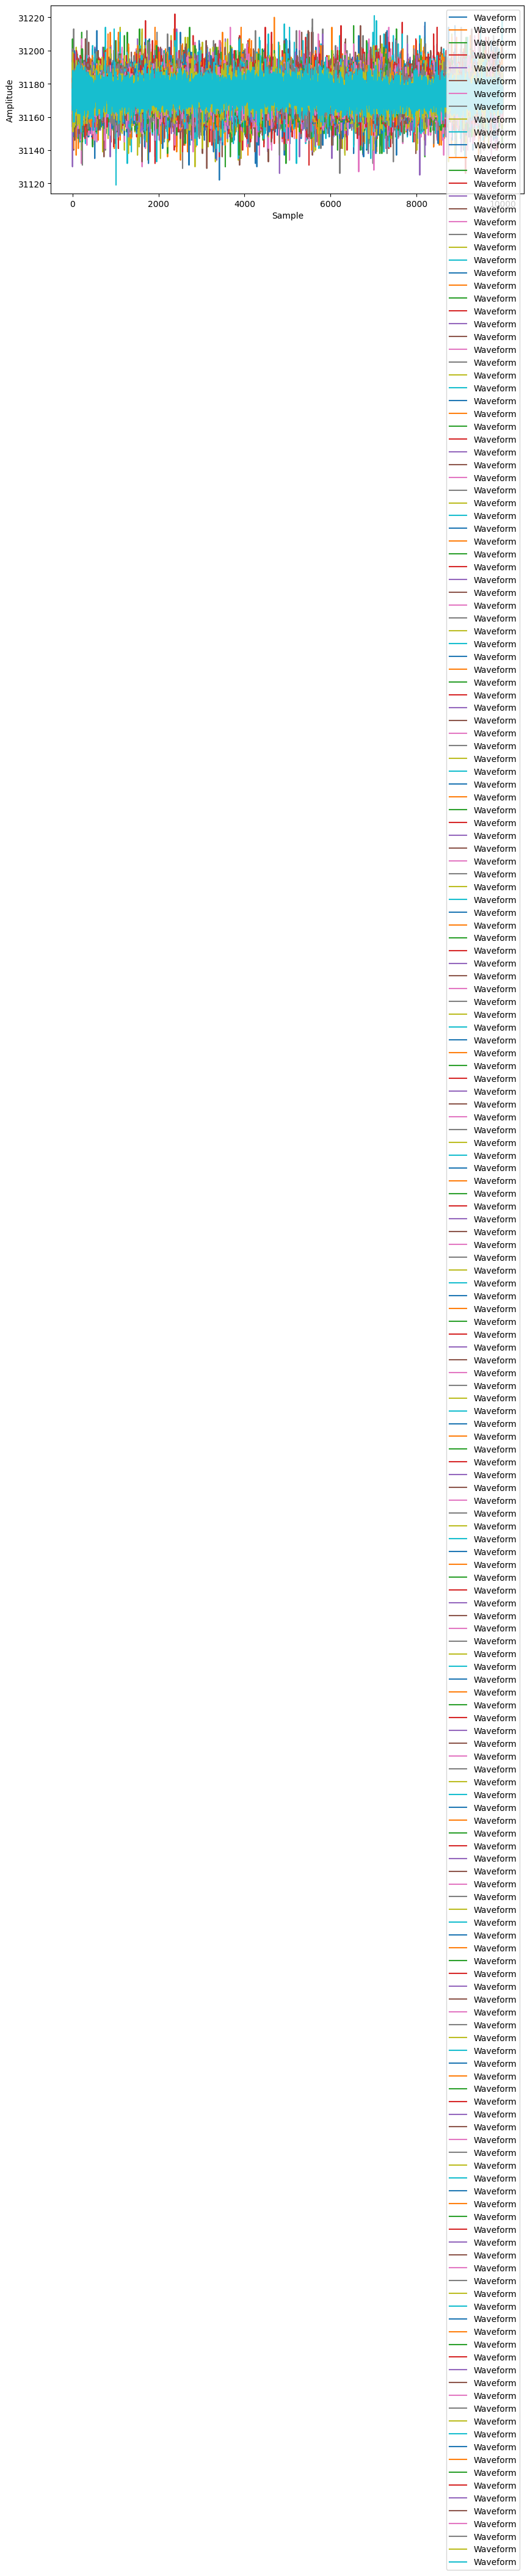

In [18]:
def sum_waveforms(channels, channel_names):
    return np.sum([channels[name] for name in channel_names], axis=0)

# Example usage:
selected_channel_names = ['adc_b1_ch0', 'adc_b1_ch1']
summed_waveform = sum_waveforms(channels, selected_channel_names)
plot_waveform(summed_waveform)

In [19]:
pmt_positions = np.array([[x, y, z] for x, y, z in zip(tree['pmt_x'].array(), tree['pmt_y'].array(), tree['pmt_z'].array())])

def plot_event_3d(pmt_positions, intensities):
    fig = go.Figure(data=[go.Scatter3d(
        x=pmt_positions[:, 0],
        y=pmt_positions[:, 1],
        z=pmt_positions[:, 2],
        mode='markers',
        marker=dict(
            size=intensities,
            color=intensities,
            colorscale='Viridis',
            opacity=0.8
        )
    )])
    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ))
    fig.show()

# Example usage:
intensities = np.random.random(len(pmt_positions)) * 100  # Replace with actual intensities
plot_event_3d(pmt_positions, intensities)

KeyInFileError: not found: 'pmt_x'

    Available keys: 'event_id', 'event_ttt', 'adc_b1_ch6', 'adc_b1_ch4', 'adc_b2_ch4', 'adc_b2_ch7', 'adc_b3_ch3', 'adc_b2_ch8', 'adc_b2_ch9', 'adc_b1_ch0', 'adc_b1_ch7', 'adc_b2_ch1', 'adc_b3_ch0', 'adc_b2_ch0', 'adc_b2_ch6'...

in file /home/wangbtc/all_pmt_test_240607T1658_0.root
in object /daq;1